# L2 Regularization
This notebook aims to help gain a better understanding of L2 regularization by adding a L2 regularization term into the loss function and comparing the trajectory of the loss functions for the loss function without the L2 regularization term and the loss funciton with the L2 regularization term.

### Imports 
Import all the libraries needed to define the neural network model and the loss function as well as plot them

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap

### Define Training Data 
Define 30 input/output pairs to use as training data for the neural network model

In [2]:
data = np.array([[-1.920e+00,-1.422e+01,1.490e+00,-1.940e+00,-2.389e+00,-5.090e+00,
                 -8.861e+00,3.578e+00,-6.010e+00,-6.995e+00,3.634e+00,8.743e-01,
                 -1.096e+01,4.073e-01,-9.467e+00,8.560e+00,1.062e+01,-1.729e-01,
                  1.040e+01,-1.261e+01,1.574e-01,-1.304e+01,-2.156e+00,-1.210e+01,
                 -1.119e+01,2.902e+00,-8.220e+00,-1.179e+01,-8.391e+00,-4.505e+00],
                  [-1.051e+00,-2.482e-02,8.896e-01,-4.943e-01,-9.371e-01,4.306e-01,
                  9.577e-03,-7.944e-02 ,1.624e-01,-2.682e-01,-3.129e-01,8.303e-01,
                  -2.365e-02,5.098e-01,-2.777e-01,3.367e-01,1.927e-01,-2.222e-01,
                  6.352e-02,6.888e-03,3.224e-02,1.091e-02,-5.706e-01,-5.258e-02,
                  -3.666e-02,1.709e-01,-4.805e-02,2.008e-01,-1.904e-01,5.952e-01]])

### Define Gabor Model
Define the Gabor model as the neural network model for this notebook

In [3]:
def model(phi,x):
  sin_component = np.sin(phi[0] + 0.06 * phi[1] * x)
  gauss_component = np.exp(-(phi[0] + 0.06 * phi[1] * x) * (phi[0] + 0.06 * phi[1] * x) / 32)
  y_pred= sin_component * gauss_component
  return y_pred

### Define Gabor Model Plotting Function
Define a function that plots the Gabor model

In [4]:
def draw_model(data,model,phi,title=None):
  x_model = np.arange(-15,15,0.1)
  y_model = model(phi,x_model)

  fix, ax = plt.subplots()
  ax.plot(data[0,:],data[1,:],'bo')
  ax.plot(x_model,y_model,'m-')
  ax.set_xlim([-15,15]);ax.set_ylim([-1,1])
  ax.set_xlabel('x'); ax.set_ylabel('y')
  if title is not None:
    ax.set_title(title)
  plt.show()

### Initialize Parameters
Intialize parameters for the Gabor model

In [5]:
phi = np.zeros((2,1))
phi[0] =  -5     # Horizontal offset
phi[1] =  25     # Frequency

### Plot the Gabor Model with Initial Parameters

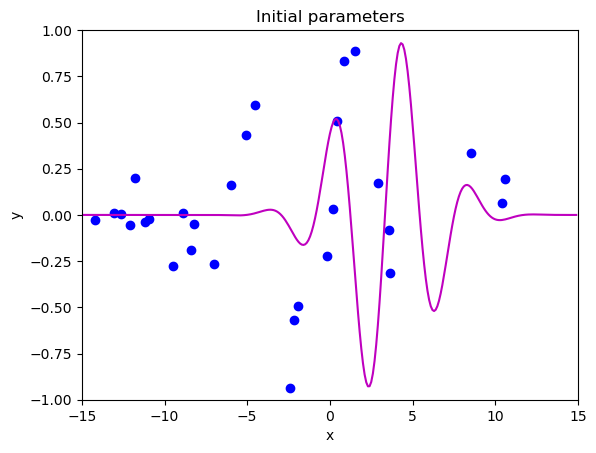

In [6]:
draw_model(data,model,phi, "Initial parameters")

### Define Loss Function
Define a function that computes the loss of the Gabor Model by comparing its predicitions to the training data

In [7]:
def compute_loss(data_x, data_y, model, phi):
  pred_y = model(phi, data_x)
  loss = np.sum((pred_y-data_y)*(pred_y-data_y))
  return loss

### Define Loss Plotting Function
Define a function that plots the loss of a neural network model

In [8]:
# Define colormap for plotting
my_colormap_vals_hex =('2a0902', '2b0a03', '2c0b04', '2d0c05', '2e0c06', '2f0d07', '300d08', '310e09', '320f0a', '330f0b', '34100b', '35110c', '36110d', '37120e', '38120f', '39130f', '3a1410', '3b1411', '3c1511', '3d1612', '3e1613', '3f1713', '401714', '411814', '421915', '431915', '451a16', '461b16', '471b17', '481c17', '491d18', '4a1d18', '4b1e19', '4c1f19', '4d1f1a', '4e201b', '50211b', '51211c', '52221c', '53231d', '54231d', '55241e', '56251e', '57261f', '58261f', '592720', '5b2821', '5c2821', '5d2922', '5e2a22', '5f2b23', '602b23', '612c24', '622d25', '632e25', '652e26', '662f26', '673027', '683027', '693128', '6a3229', '6b3329', '6c342a', '6d342a', '6f352b', '70362c', '71372c', '72372d', '73382e', '74392e', '753a2f', '763a2f', '773b30', '783c31', '7a3d31', '7b3e32', '7c3e33', '7d3f33', '7e4034', '7f4134', '804235', '814236', '824336', '834437', '854538', '864638', '874739', '88473a', '89483a', '8a493b', '8b4a3c', '8c4b3c', '8d4c3d', '8e4c3e', '8f4d3f', '904e3f', '924f40', '935041', '945141', '955242', '965343', '975343', '985444', '995545', '9a5646', '9b5746', '9c5847', '9d5948', '9e5a49', '9f5a49', 'a05b4a', 'a15c4b', 'a35d4b', 'a45e4c', 'a55f4d', 'a6604e', 'a7614e', 'a8624f', 'a96350', 'aa6451', 'ab6552', 'ac6552', 'ad6653', 'ae6754', 'af6855', 'b06955', 'b16a56', 'b26b57', 'b36c58', 'b46d59', 'b56e59', 'b66f5a', 'b7705b', 'b8715c', 'b9725d', 'ba735d', 'bb745e', 'bc755f', 'bd7660', 'be7761', 'bf7862', 'c07962', 'c17a63', 'c27b64', 'c27c65', 'c37d66', 'c47e67', 'c57f68', 'c68068', 'c78169', 'c8826a', 'c9836b', 'ca846c', 'cb856d', 'cc866e', 'cd876f', 'ce886f', 'ce8970', 'cf8a71', 'd08b72', 'd18c73', 'd28d74', 'd38e75', 'd48f76', 'd59077', 'd59178', 'd69279', 'd7937a', 'd8957b', 'd9967b', 'da977c', 'da987d', 'db997e', 'dc9a7f', 'dd9b80', 'de9c81', 'de9d82', 'df9e83', 'e09f84', 'e1a185', 'e2a286', 'e2a387', 'e3a488', 'e4a589', 'e5a68a', 'e5a78b', 'e6a88c', 'e7aa8d', 'e7ab8e', 'e8ac8f', 'e9ad90', 'eaae91', 'eaaf92', 'ebb093', 'ecb295', 'ecb396', 'edb497', 'eeb598', 'eeb699', 'efb79a', 'efb99b', 'f0ba9c', 'f1bb9d', 'f1bc9e', 'f2bd9f', 'f2bfa1', 'f3c0a2', 'f3c1a3', 'f4c2a4', 'f5c3a5', 'f5c5a6', 'f6c6a7', 'f6c7a8', 'f7c8aa', 'f7c9ab', 'f8cbac', 'f8ccad', 'f8cdae', 'f9ceb0', 'f9d0b1', 'fad1b2', 'fad2b3', 'fbd3b4', 'fbd5b6', 'fbd6b7', 'fcd7b8', 'fcd8b9', 'fcdaba', 'fddbbc', 'fddcbd', 'fddebe', 'fddfbf', 'fee0c1', 'fee1c2', 'fee3c3', 'fee4c5', 'ffe5c6', 'ffe7c7', 'ffe8c9', 'ffe9ca', 'ffebcb', 'ffeccd', 'ffedce', 'ffefcf', 'fff0d1', 'fff2d2', 'fff3d3', 'fff4d5', 'fff6d6', 'fff7d8', 'fff8d9', 'fffada', 'fffbdc', 'fffcdd', 'fffedf', 'ffffe0')
my_colormap_vals_dec = np.array([int(element,base=16) for element in my_colormap_vals_hex])
r = np.floor(my_colormap_vals_dec/(256*256))
g = np.floor((my_colormap_vals_dec - r *256 *256)/256)
b = np.floor(my_colormap_vals_dec - r * 256 *256 - g * 256)
my_colormap = ListedColormap(np.vstack((r,g,b)).transpose()/255.0)

# Define a function to plot the loss function
def draw_loss_function(compute_loss, data,  model, my_colormap, phi_iters = None):
  # Define grid of offset/frequency values to plot
  offsets_mesh, freqs_mesh = np.meshgrid(np.arange(-10,10.0,0.1), np.arange(2.5,22.5,0.1))
  loss_mesh = np.zeros_like(freqs_mesh)

  # Compute loss for every set of parameters
  for idslope, slope in np.ndenumerate(freqs_mesh):
     loss_mesh[idslope] = compute_loss(data[0,:], data[1,:], model, np.array([[offsets_mesh[idslope]], [slope]]))

  fig,ax = plt.subplots()
  fig.set_size_inches(8,8)
  ax.contourf(offsets_mesh,freqs_mesh,loss_mesh,256,cmap=my_colormap)
  ax.contour(offsets_mesh,freqs_mesh,loss_mesh,20,colors=['#80808080'])
  if phi_iters is not None:
    ax.plot(phi_iters[0,:], phi_iters[1,:],'go-')
  ax.set_ylim([2.5,22.5])
  ax.set_xlabel('Offset phi[0]'); ax.set_ylabel('Frequency, phi[1]')
  plt.show()

### Plot Loss Function
Plot the loss function of the initial Gabor model

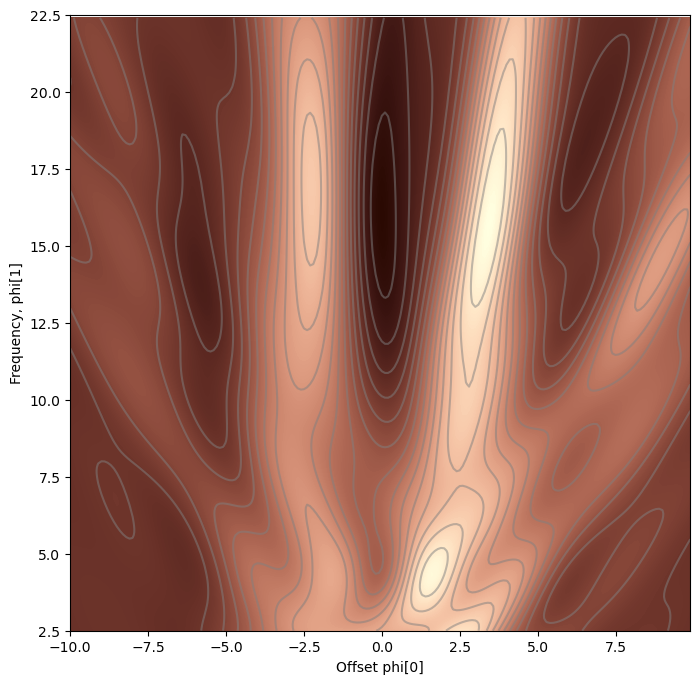

In [9]:
draw_loss_function(compute_loss, data, model, my_colormap)

### Define Phi0 Derivative (Loss Function)
Define a function that computes the derivative of the loss function with respect to phi0

In [10]:
def gabor_deriv_phi0(data_x,data_y,phi0, phi1):
    x = 0.06 * phi1 * data_x + phi0
    y = data_y
    cos_component = np.cos(x)
    sin_component = np.sin(x)
    gauss_component = np.exp(-0.5 * x *x / 16)
    deriv = cos_component * gauss_component - sin_component * gauss_component * x / 16
    deriv = 2* deriv * (sin_component * gauss_component - y)
    return np.sum(deriv)

### Define Phi1 Derivative (Loss Function)
Define a function that computes the derivative of the loss function with respect to phi1

In [11]:
def gabor_deriv_phi1(data_x, data_y,phi0, phi1):
    x = 0.06 * phi1 * data_x + phi0
    y = data_y
    cos_component = np.cos(x)
    sin_component = np.sin(x)
    gauss_component = np.exp(-0.5 * x *x / 16)
    deriv = 0.06 * data_x * cos_component * gauss_component - 0.06 * data_x*sin_component * gauss_component * x / 16
    deriv = 2*deriv * (sin_component * gauss_component - y)
    return np.sum(deriv)

### Define Gradient Function
Define a function that computes the gradient of a neural network model using the previously defined phi1 derivative and phi0 derivative

In [12]:
def compute_gradient(data_x, data_y, phi):
    dl_dphi0 = gabor_deriv_phi0(data_x, data_y, phi[0],phi[1])
    dl_dphi1 = gabor_deriv_phi1(data_x, data_y, phi[0],phi[1])
    return np.array([[dl_dphi0],[dl_dphi1]])

### Define Gradient Step Function
Define a function that uses the computed gradient to perform a gradient descent step and adjusts the value of the parameters based on that gradient descent step

In [13]:
def gradient_descent_step(phi, data,  model):
  # Compute the gradient
  gradient = compute_gradient(data[0,:],data[1,:], phi)
  # Update the parameters by moving in the negative direction of the gradient
  alpha = 0.1
  phi = phi - alpha * gradient
  return phi

### Initialize Parameters
Initialize parameters for the Gabor model

In [14]:
n_steps = 41
phi_all = np.zeros((2,n_steps+1))
phi_all[0,0] = 2.6
phi_all[1,0] = 8.5

### Compute Loss
Compute the loss of the initial Gabor model with parameters defined above

In [15]:
loss =  compute_loss(data[0,:], data[1,:], model, phi_all[:,0:1])

### Plot Loss Function
Plot the loss function of the Gabor model

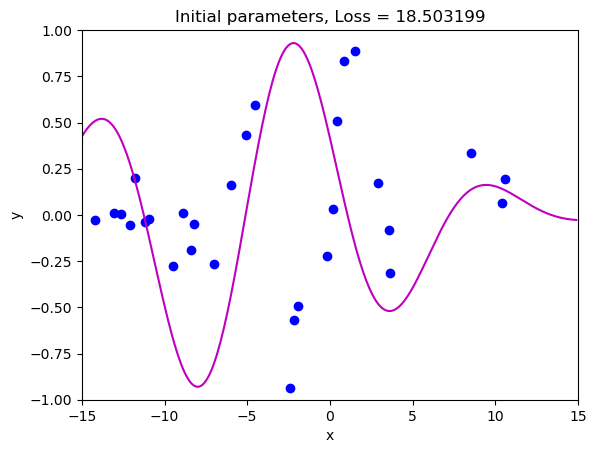

In [16]:
draw_model(data,model,phi_all[:,0:1], "Initial parameters, Loss = %f"%(loss))

### Compute Gradient Descent Step 
Compute the gradient descent step over itterations to update the parameter values to minimize the loss of the function

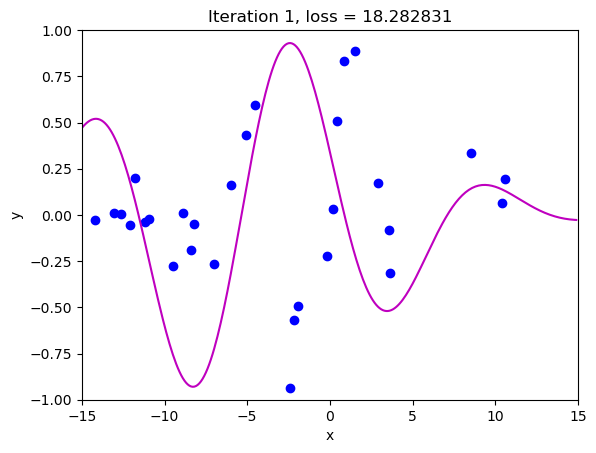

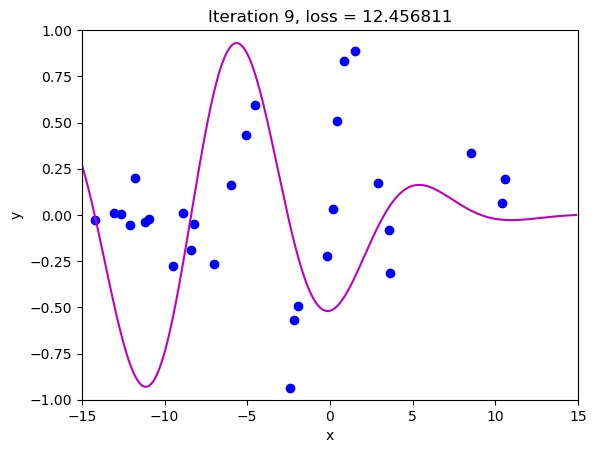

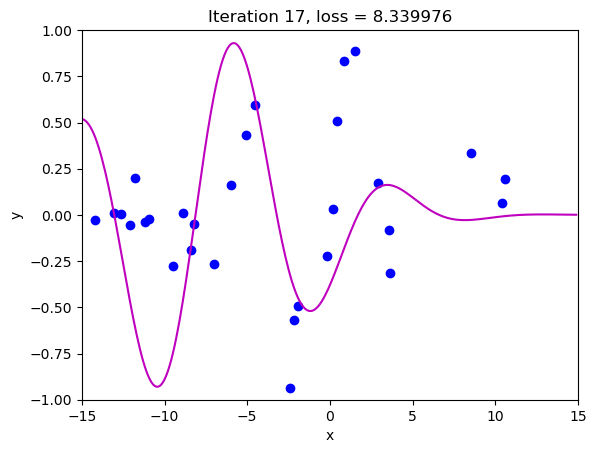

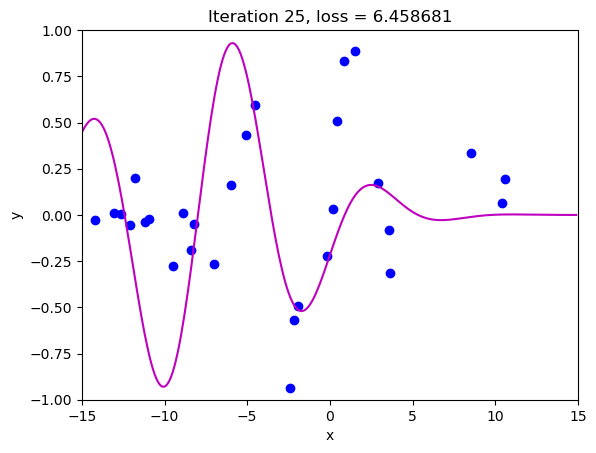

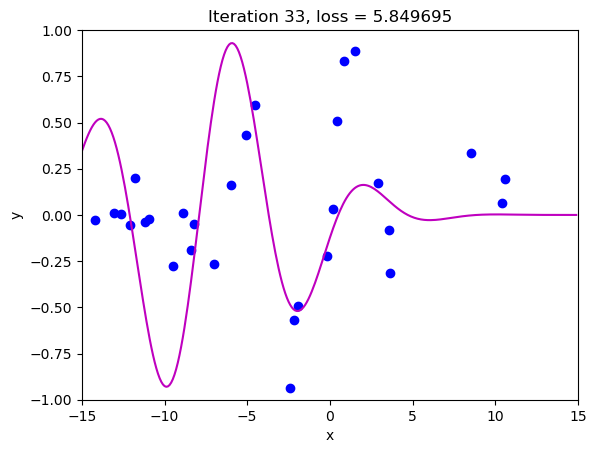

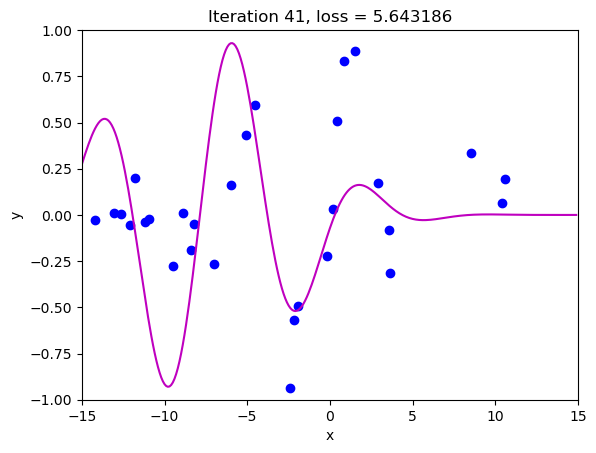

In [17]:
for c_step in range (n_steps):
  # Undergo the gradient descent step
  phi_all[:,c_step+1:c_step+2] = gradient_descent_step(phi_all[:,c_step:c_step+1],data, model)
  # Compute the loss and draw model every 8th step
  if c_step % 8 == 0:
    loss =  compute_loss(data[0,:], data[1,:], model, phi_all[:,c_step+1:c_step+2])
    draw_model(data,model,phi_all[:,c_step+1], "Iteration %d, loss = %f"%(c_step+1,loss))

### Plot Loss Function Trajectory
Plot the intermediate values of the loss function to see its trajectory over itterations of the gradient descent step function

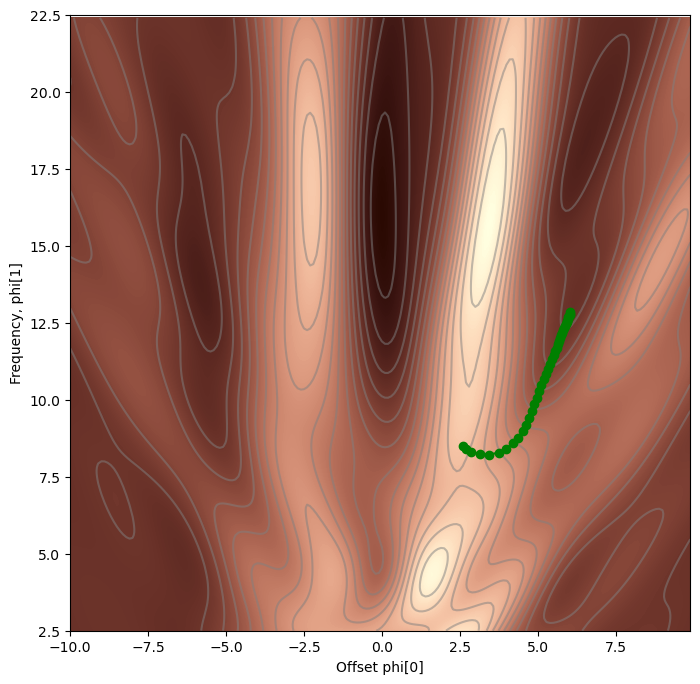

In [18]:
draw_loss_function(compute_loss, data, model, my_colormap, phi_all)

## Regularization

### Define Regularization Term

In [19]:
def compute_reg_term(phi0,phi1):
  reg_term = (phi0**2) + (phi1 - 12.5)**2

  return reg_term 

### Define the Modified Loss Function
Define the modified loss function, which is the least squares loss function with a regularization term

In [20]:
def compute_loss2(data_x, data_y, model, phi, lambda_):
  pred_y = model(phi, data_x)
  loss = np.sum((pred_y-data_y)*(pred_y-data_y))

  # Add the regularization term to the loss
  loss = loss + lambda_ * compute_reg_term(phi[0],phi[1])

  return loss

### Define Regularization Plotting Function
Define a function that plots the regularization function

In [21]:
def draw_reg_function():
  # Define a grid of offset/frequency values to plot
  offsets_mesh, freqs_mesh = np.meshgrid(np.arange(-10,10.0,0.1), np.arange(2.5,22.5,0.1))
  loss_mesh = np.zeros_like(freqs_mesh)
  # Compute loss for every set of parameters
  for idslope, slope in np.ndenumerate(freqs_mesh):
     loss_mesh[idslope] = compute_reg_term(offsets_mesh[idslope], slope)

  fig,ax = plt.subplots()
  fig.set_size_inches(8,8)
  ax.contourf(offsets_mesh,freqs_mesh,loss_mesh,256,cmap=my_colormap)
  ax.contour(offsets_mesh,freqs_mesh,loss_mesh,20,colors=['#80808080'])
  ax.set_ylim([2.5,22.5])
  ax.set_xlabel('Offset phi[0]'); ax.set_ylabel('Frequency, phi[1]')
  plt.show()

### Plot Regularization Function

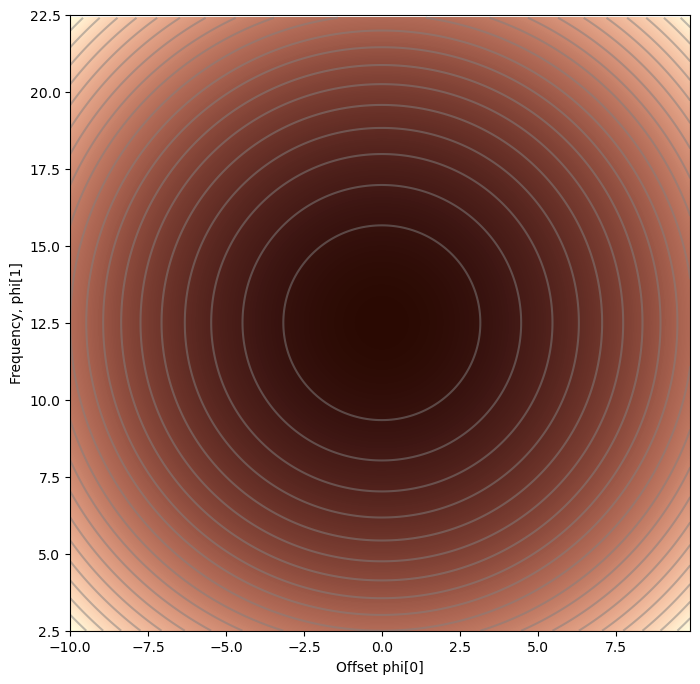

In [22]:
draw_reg_function()

### Define Modified Loss Plotting Function
Define a function that plots the modified loss function or the loss function with the regularization term

In [23]:
def draw_loss_function_reg(data,  model, lambda_, my_colormap, phi_iters = None):
  # Define grid of offset/frequency values to plot
  offsets_mesh, freqs_mesh = np.meshgrid(np.arange(-10,10.0,0.1), np.arange(2.5,22.5,0.1))
  loss_mesh = np.zeros_like(freqs_mesh)
  # Compute loss for every set of parameters
  for idslope, slope in np.ndenumerate(freqs_mesh):
     loss_mesh[idslope] = compute_loss2(data[0,:], data[1,:], model, np.array([[offsets_mesh[idslope]], [slope]]), lambda_)

  fig,ax = plt.subplots()
  fig.set_size_inches(8,8)
  ax.contourf(offsets_mesh,freqs_mesh,loss_mesh,256,cmap=my_colormap)
  ax.contour(offsets_mesh,freqs_mesh,loss_mesh,20,colors=['#80808080'])
  if phi_iters is not None:
    ax.plot(phi_iters[0,:], phi_iters[1,:],'go-')
  ax.set_ylim([2.5,22.5])
  ax.set_xlabel('Offset phi[0]'); ax.set_ylabel('Frequency, phi[1]')
  plt.show()

### Plot Modified Loss Function

/var/folders/hd/f_gk36z51lj__phqtmgrmv8w0000gn/T/ipykernel_82811/2781376809.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  loss_mesh[idslope] = compute_loss2(data[0,:], data[1,:], model, np.array([[offsets_mesh[idslope]], [slope]]), lambda_)


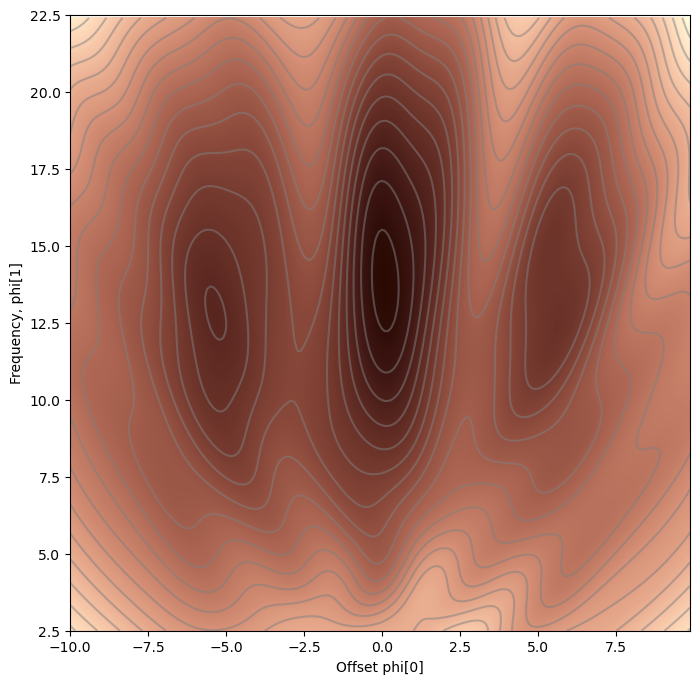

In [24]:
draw_loss_function_reg(data, model, 0.2, my_colormap)

### Define Phi0 Derivative (Modified Loss Function)
Define a function that computes the derivative of the modified loss function with respect to phi0

In [25]:
def dregdphi0(phi, lambda_):
  deriv = 2*lambda_*phi

  return deriv

### Define Phi1 Derivative (Modified Loss Function)
Define a function that computes the derivative of the modified loss function with respect to phi1

In [26]:
def dregdphi1(phi, lambda_):
  deriv = 2*lambda_*(phi - 12.5)

  return deriv

### Define Gradient Step Function with Modified Loss Function
Define a function that computes the gradient of the neural network model with the modified loss function

In [27]:
def compute_gradient2(data_x, data_y, phi, lambda_):
    phi0 = float(phi[0, 0])   # Extract phi0 value
    phi1 = float(phi[1, 0])   # Extract phi1 value

    # Compute the gradient
    dl_dphi0 = gabor_deriv_phi0(data_x, data_y, phi0, phi1) \
               + dregdphi0(phi0, lambda_)

    dl_dphi1 = gabor_deriv_phi1(data_x, data_y, phi0, phi1) \
               + dregdphi1(phi1, lambda_)

    # Return gradient
    return np.array([[dl_dphi0], [dl_dphi1]])

### Define Gradient Descent Step Function with Modified Loss Function
Define a function that uses the computed gradient to update the parameters in order to minimize the modified loss function

In [28]:
def gradient_descent_step2(phi, lambda_, data,  model):
  # Compute the gradient
  gradient = compute_gradient2(data[0,:],data[1,:], phi, lambda_)

  # Update the parameters based on the computed gradient
  alpha = 0.1
  phi = phi - alpha * gradient
  return phi

### Initialize Parameters

In [29]:
n_steps = 41
phi_all = np.zeros((2,n_steps+1))
phi_all[0,0] = 2.6
phi_all[1,0] = 8.5
lambda_ = 0.2

### Compute Initial Loss
Compute the loss of the Gabor Model with the initial parameters

In [30]:
loss =  compute_loss2(data[0,:], data[1,:], model, phi_all[:,0:1], lambda_)

### Plot Initial Gabor Model

/var/folders/hd/f_gk36z51lj__phqtmgrmv8w0000gn/T/ipykernel_82811/3601211004.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  draw_model(data,model,phi_all[:,0:1], "Initial parameters, Loss = %f"%(loss))


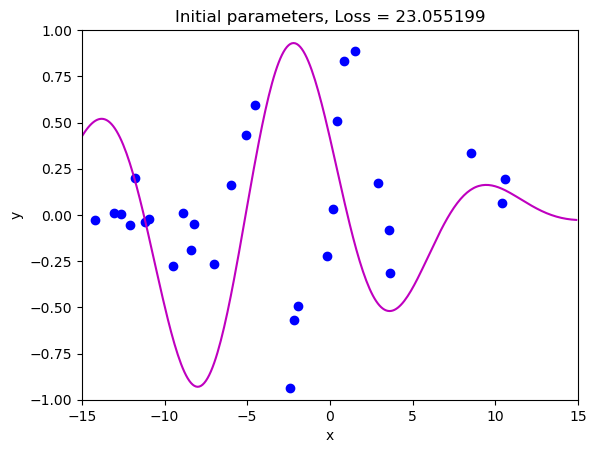

In [31]:
draw_model(data,model,phi_all[:,0:1], "Initial parameters, Loss = %f"%(loss))

### Compute Gradient Descent Step
Compute the gradient descent step where the loss function has a regularization term added to it. Using the computed gradient descent step, update the parameters of the model in order to minimize the modified loss function

/var/folders/hd/f_gk36z51lj__phqtmgrmv8w0000gn/T/ipykernel_82811/2912178414.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  draw_model(data,model,phi_all[:,c_step+1], "Iteration %d, loss = %f"%(c_step+1,loss))


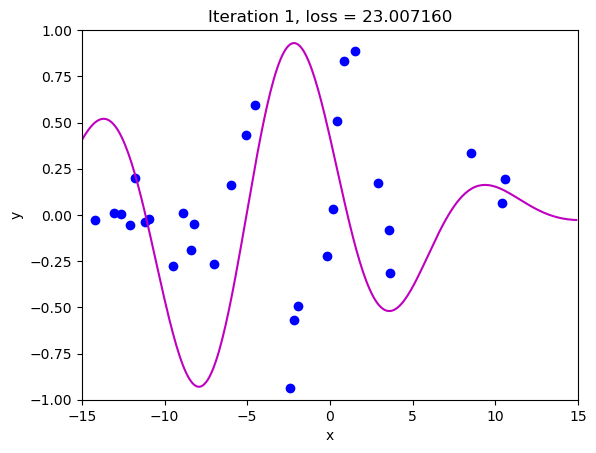

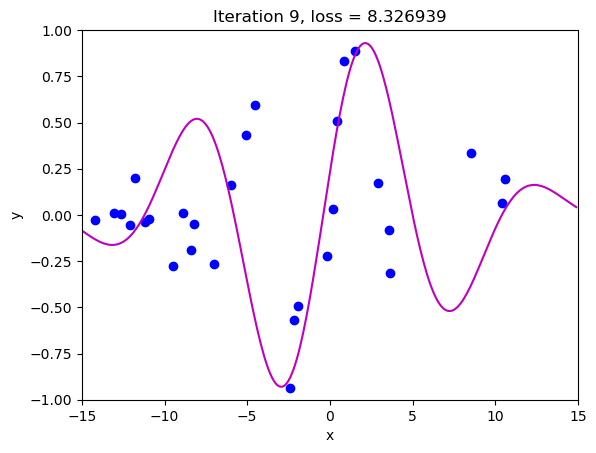

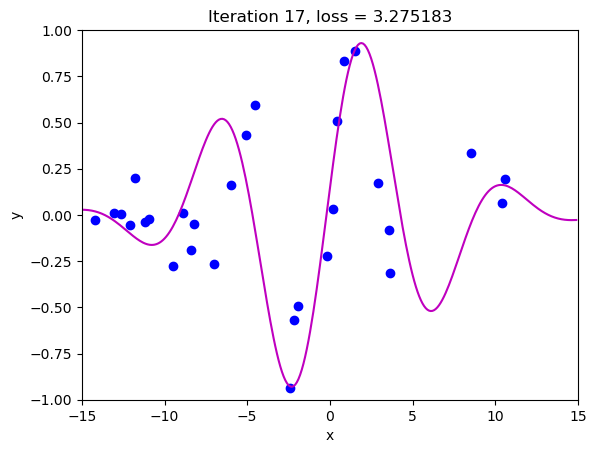

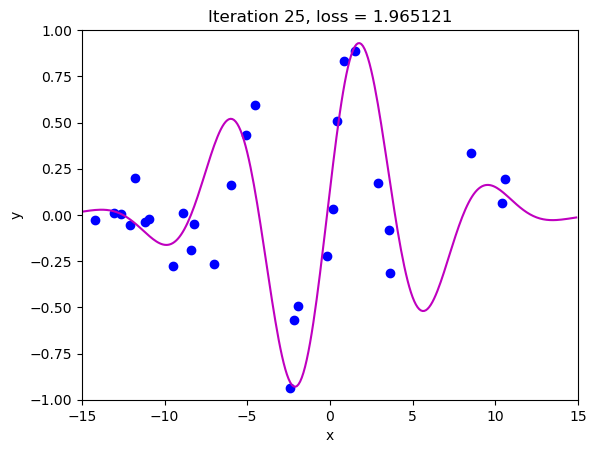

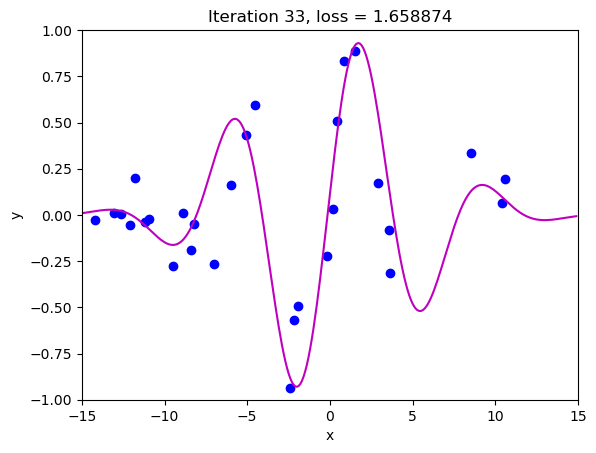

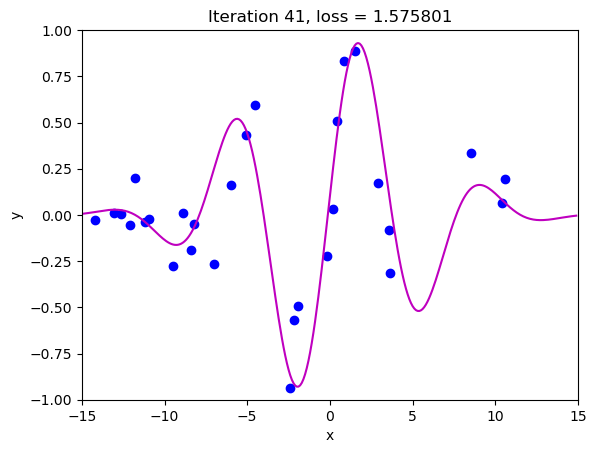

In [32]:
for c_step in range (n_steps):
  # Compute gradient descent step
  phi_all[:,c_step+1:c_step+2] = gradient_descent_step2(phi_all[:,c_step:c_step+1],lambda_, data, model)

  # Compute the loss and draw model every 8th step
  if c_step % 8 == 0:
    loss =  compute_loss2(data[0,:], data[1,:], model, phi_all[:,c_step+1:c_step+2], lambda_)
    draw_model(data,model,phi_all[:,c_step+1], "Iteration %d, loss = %f"%(c_step+1,loss))

### Plot Loss Function with Regularization
Plot the trajectory of the modified loss function

/var/folders/hd/f_gk36z51lj__phqtmgrmv8w0000gn/T/ipykernel_82811/2781376809.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  loss_mesh[idslope] = compute_loss2(data[0,:], data[1,:], model, np.array([[offsets_mesh[idslope]], [slope]]), lambda_)


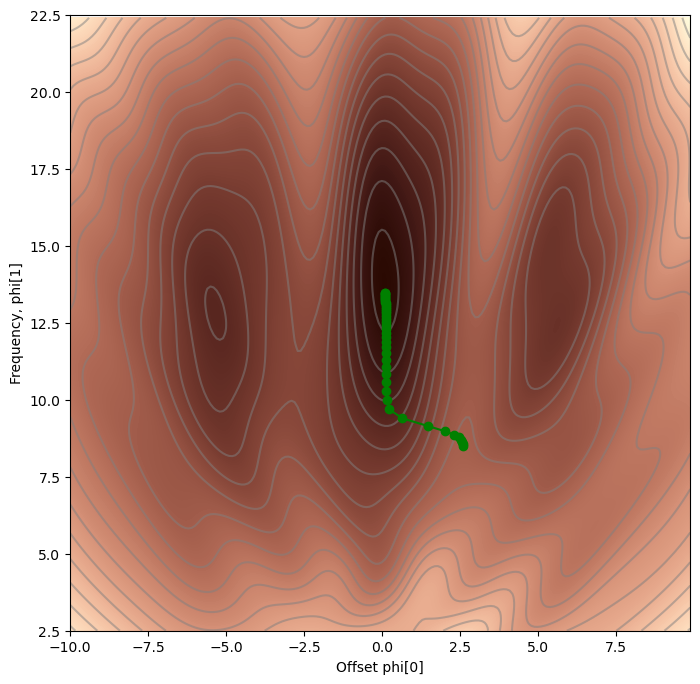

In [33]:
draw_loss_function_reg(data, model, lambda_, my_colormap, phi_all)